# Hi everyone!

Analyzing data and identifying certain patterns is something that can also be applied to understand certain behaviors and " categories " of people, and that's what we'll see today ! For this, we will use this dataset available here : 

https://www.kaggle.com/datasets/vetrirah/customer

# Dataset Presentation

#### Context : 
An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market. 

#### Columns Description : 

ID : Customer's ID.

Gender : Customer's Gender (Male/Female)

Ever_Married : Marrital Statue of the Customer (Yes/No)

Age : Customer's Age

Graduated : If the Customer is Graduated or No (Yes/No)

Work_Experience : Customer's Work Experience in Years

Spending Score : Spending Score of the Customer (Low,Average,High)

Var_1 : Anonymised Category for the customer. ('Cat_1','Cat_2',..,'Cat_6') (WE WILL NOT FOCUS ON THIS)

Segmentation : Category of the Customer (WE WILL NOT FOCUS ON THIS)

#### Dataset Preview

In [72]:
pd.read_csv('Train.csv').head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


#### Our Goal

The dataset was originally given for a competition where they had to make a model to PREDICT the customers segments with a Train.csv and a Test.csv files, but since we want to detect the categories by ourselves, we will not use the "Segmentation" column !

# Let's Start !

## Importing Libraries & General Overview

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#To not display certain errors
import warnings
warnings.filterwarnings('ignore')

In [74]:
df=pd.read_csv('Train.csv')
df=df.drop(['Var_1','Segmentation'],axis=1) #Let's remove the unnecessary columns first 
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0
...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0


#### Checking if there is Null values + Columns Values

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 567.4+ KB


In [76]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


It looks like there are some Null values in our data, but at least our numerical values look consistent and in the right ranges.

#### Adding new Columns

For the purpose of our analysis, we will categorize our "Age" field into a new column by making some ranges.

In [77]:
df['AgeCat']=pd.cut(df['Age'],bins=[0, 18, 25, 35,46, 100], labels=['0-18', '19-25', '26-35', '36-46','47+'])
df.head(3)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,AgeCat
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,19-25
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,36-46
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,47+


## Data Cleaning (We'll check each field and their missing values.)

### Usefull Functions

In [78]:
def null_values(field):
    return df[field].isnull().sum()
print("Missing Values :")
for i in df.columns:
    print(i+' : ',null_values(i))

Missing Values :
ID :  0
Gender :  0
Ever_Married :  140
Age :  0
Graduated :  78
Profession :  124
Work_Experience :  829
Spending_Score :  0
Family_Size :  335
AgeCat :  0


In [79]:
def groupby_count(df, groupby_cols, count_col, filter_cols=None):
    if filter_cols:
        df = df[filter_cols + groupby_cols + [count_col]]
    else:
        df = df[groupby_cols + [count_col]]
    return df.groupby(by=groupby_cols).count()

### Ever_Married

In [80]:
print(groupby_count(df, ['Spending_Score','Ever_Married'], 'ID') )

                               ID
Spending_Score Ever_Married      
Average        Yes           1937
High           Yes           1176
Low            No            3285
               Yes           1530


- All Average / High Spending_Score are Married

In [81]:
print(groupby_count(df, ['Profession','Ever_Married'], 'ID') )

                              ID
Profession    Ever_Married      
Artist        No             713
              Yes           1774
Doctor        No             366
              Yes            311
Engineer      No             267
              Yes            415
Entertainment No             358
              Yes            579
Executive     No              37
              Yes            550
Healthcare    No            1153
              Yes            145
Homemaker     No             112
              Yes            128
Lawyer        No              40
              Yes            575
Marketing     No             189
              Yes             96


- People with Healthcare profession are mostly not married

In [82]:
print(groupby_count(df, ['AgeCat','Ever_Married'], 'ID') )

                       ID
AgeCat Ever_Married      
0-18   No             125
       Yes              4
19-25  No             771
       Yes             69
26-35  No            1360
       Yes            553
36-46  No             723
       Yes           1338
47+    No             306
       Yes           2679


- 47+ People are mostly married
- 19-25 People are mostly not married
- 26-35 People are mostly not married

In [83]:
x=df.query("Spending_Score == 'High' and Ever_Married.isna()")
x['Ever_Married']='Yes'
df.update(x)

x=df.query("Profession == 'Healthcare' and Ever_Married.isna()")
x['Ever_Married']='No'
df.update(x)

x=df.query("AgeCat == '47+' and Ever_Married.isna()")
x['Ever_Married']='Yes'
df.update(x)

x=df.query("AgeCat == '19-25' and Ever_Married.isna()")
x['Ever_Married']='No'
df.update(x)

x=df.query("AgeCat == '26-35' and Ever_Married.isna()")
x['Ever_Married']='No'
df.update(x)

In [84]:
print(null_values("Ever_Married")," We're not done yet !")

19  We're not done yet !


#### We have to check the 36-46 range now

In [85]:
df.query("Ever_Married.isna()")['AgeCat'].unique()

array(['36-46'], dtype=object)

In [86]:
print(groupby_count(df.query("AgeCat=='36-46'"), ['AgeCat','Profession','Ever_Married'], 'ID'))

                                    ID
AgeCat Profession    Ever_Married     
36-46  Artist        No            320
                     Yes           603
       Doctor        No             70
                     Yes           113
       Engineer      No             83
                     Yes           146
       Entertainment No            105
                     Yes           196
       Executive     No              8
                     Yes           152
       Healthcare    No             55
                     Yes            40
       Homemaker     No             30
                     Yes            40
       Lawyer        No              2
                     Yes             2
       Marketing     No             43
                     Yes            28


- For people in 36-46, they're mostly married, apart for those in the Marketing field

In [87]:
x=df.query("AgeCat=='36-46' and Ever_Married.isna() and Profession != 'Marketing'")
y=df.query("AgeCat=='36-46' and Ever_Married.isna() and Profession == 'Marketing'")

x['Ever_Married']='Yes'
y['Ever_Married']='No'

df.update(x)
df.update(y)

print(null_values('Ever_Married')," (Let's go !) ")

0  (Let's go !) 


### Graduated

In [88]:
print(null_values('Graduated'))

78


In [89]:
print(groupby_count(df, ['AgeCat','Graduated'], 'ID') )

                    ID
AgeCat Graduated      
0-18   No          129
       Yes           1
19-25  No          744
       Yes         110
26-35  No          844
       Yes        1086
36-46  No          485
       Yes        1582
47+    No          820
       Yes        2189


- 0-18 People Are mostly not graduated
- 19-25 People are mostly not graduated
- 47+ People are mostly graduated

In [91]:
print(groupby_count(df, ['Profession','Graduated'], 'ID') )

                           ID
Profession    Graduated      
Artist        No          293
              Yes        2209
Doctor        No          288
              Yes         395
Engineer      No          385
              Yes         310
Entertainment No          345
              Yes         592
Executive     No          294
              Yes         300
Healthcare    No          844
              Yes         476
Homemaker     No          106
              Yes         138
Lawyer        No          230
              Yes         381
Marketing     No          173
              Yes         114


- Most Artist are graduated

In [92]:
print(groupby_count(df, ['Ever_Married','Graduated'], 'ID') )

                          ID
Ever_Married Graduated      
No           No         1622
             Yes        1677
Yes          No         1400
             Yes        3291


- There is more chance that married people are Graduated

In [93]:
x=df.query("(AgeCat=='0-18' or AgeCat=='19-25') and Graduated.isna()")
x['Graduated']='No'
df.update(x)

x=df.query("Profession=='Artist' and Graduated.isna()")
x['Graduated']='Yes'
df.update(x)

x=df.query("(AgeCat=='47+') and Graduated.isna()")
x['Graduated']='Yes'
df.update(x)

x=df.query("Ever_Married=='Yes' and Graduated.isna()")
x['Graduated']='Yes'
df.update(x)

In [96]:
print(null_values('Graduated')," Let's drop the rest !")

14  Let's drop the rest !


In [97]:
df=df.drop(df.query("Graduated.isna()").index)

### Profession

In [98]:
null_values("Profession")

122

<AxesSubplot: xlabel='Profession', ylabel='count'>

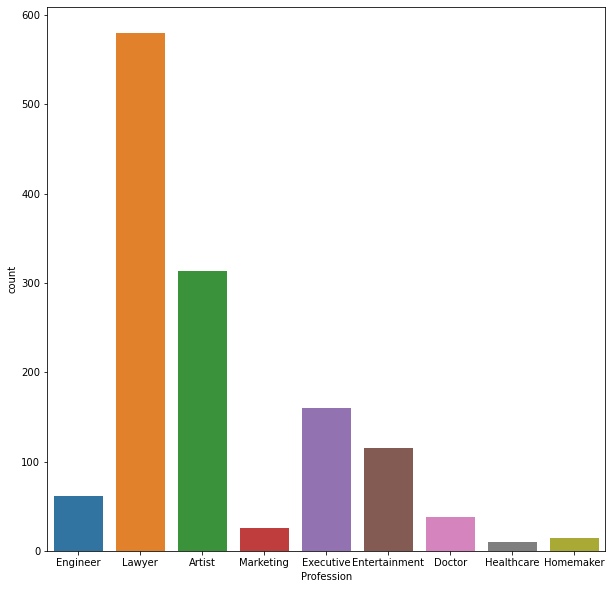

In [108]:
x=df.query("Age>60")
plt.figure(figsize=(10,10))
sns.countplot(x[["Profession"]],x="Profession")

In [109]:
print(groupby_count(x, ['Spending_Score','Profession'], 'ID') )

                               ID
Spending_Score Profession        
Average        Artist         127
               Doctor          17
               Engineer        20
               Entertainment   50
               Executive        7
               Healthcare       3
               Homemaker        3
               Lawyer          16
               Marketing        3
High           Artist          77
               Doctor           6
               Engineer        13
               Entertainment   16
               Executive      120
               Homemaker        3
               Lawyer         304
               Marketing        7
Low            Artist         109
               Doctor          15
               Engineer        28
               Entertainment   49
               Executive       33
               Healthcare       7
               Homemaker        8
               Lawyer         260
               Marketing       15


People that are 60+ years old : 
- Are mostly Artist if they have an average Spending_Score
- Are mostly Lawyers if they have a High/Low Spending_Score

In [110]:
x=df.query("Age>60 and Profession.isna() and Spending_Score=='Average'")
x['Profession']='Artist'
df.update(x)

x=df.query("Age>60 and Profession.isna() and (Spending_Score=='Low' or Spending_Score=='High')")
x['Profession']='Lawyer'
df.update(x)

In [112]:
x=df.query("Graduated=='Yes' and Profession.isna()")
x['Profession']='Artist'
df.update(x) ##Remember ! Most Artists are graduated

In [114]:
print(groupby_count(df, ['AgeCat','Profession'], 'ID') )

                        ID
AgeCat Profession         
0-18   Artist            2
       Doctor            9
       Entertainment     5
       Executive         3
       Healthcare      105
       Marketing         5
19-25  Artist           42
       Doctor           81
       Engineer         40
       Entertainment    51
       Executive        17
       Healthcare      542
       Homemaker        14
       Lawyer            3
       Marketing        62
26-35  Artist          402
       Doctor          265
       Engineer        192
       Entertainment   239
       Executive        66
       Healthcare      551
       Homemaker       111
       Lawyer            2
       Marketing        89
36-46  Artist          949
       Doctor          186
       Engineer        233
       Entertainment   301
       Executive       161
       Healthcare       95
       Homemaker        71
       Lawyer            4
       Marketing        71
47+    Artist         1177
       Doctor          145
 

In [115]:
x=df.query("(AgeCat=='0-18' or AgeCat=='19-25') and Profession.isna()")
x['Profession']='Healthcare'
df.update(x) 

x=df.query("Age>47 and Age<60 and Profession.isna()")
x['Profession']="Artist"
df.update(x)

In [116]:
print(groupby_count(df, ['Ever_Married','Profession'], 'ID') )

                              ID
Ever_Married Profession         
No           Artist          730
             Doctor          368
             Engineer        269
             Entertainment   355
             Executive        37
             Healthcare     1194
             Homemaker       115
             Lawyer           43
             Marketing       188
Yes          Artist         1851
             Doctor          318
             Engineer        429
             Entertainment   590
             Executive       562
             Healthcare      153
             Homemaker       131
             Lawyer          592
             Marketing       101


- Not Married People have a Healthcare profession
- Married People are Artists ! (Again)

In [117]:
x=df.query("Ever_Married=='Yes' and Profession.isna()")
x['Profession']="Artist"
df.update(x)

x=df.query("Ever_Married=='No' and Profession.isna()")
x['Profession']="Healthcare"
df.update(x)

### Work_Experience

In [119]:
null_values("Work_Experience")

828

In [120]:
df['Work_Experience'].describe(percentiles=[i*0.1 for i in range(10)])

count    7226.000000
mean        2.637697
std         3.405054
min         0.000000
0%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         1.000000
50%         1.000000
60%         1.000000
70%         3.000000
80%         6.000000
90%         8.000000
max        14.000000
Name: Work_Experience, dtype: float64

In [121]:
df['Work_Experience'] = df['Work_Experience'].fillna(method='pad')


In [122]:
df['Work_Experience'].describe(percentiles=[i*0.1 for i in range(10)])

count    8054.000000
mean        2.613236
std         3.391398
min         0.000000
0%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         1.000000
50%         1.000000
60%         1.000000
70%         3.000000
80%         6.000000
90%         8.000000
max        14.000000
Name: Work_Experience, dtype: float64

#### There weren't too many changes after using the "Pad" filling method, so it works and we can continue!

### Family_Size

In [123]:
null_values("Family_Size")

333

In [124]:
df['Family_Size'].describe(percentiles=[i*0.1 for i in range(10)])

count    7721.000000
mean        2.849631
std         1.529351
min         1.000000
0%          1.000000
10%         1.000000
20%         2.000000
30%         2.000000
40%         2.000000
50%         3.000000
60%         3.000000
70%         4.000000
80%         4.000000
90%         5.000000
max         9.000000
Name: Family_Size, dtype: float64

In [125]:
df['Family_Size'] = df['Family_Size'].fillna(method='pad')


In [126]:
df['Family_Size'].describe(percentiles=[i*0.1 for i in range(10)])

count    8054.000000
mean        2.846288
std         1.528556
min         1.000000
0%          1.000000
10%         1.000000
20%         2.000000
30%         2.000000
40%         2.000000
50%         3.000000
60%         3.000000
70%         4.000000
80%         4.000000
90%         5.000000
max         9.000000
Name: Family_Size, dtype: float64

## Here we go ! 
## Next Step : Preprocessing

We will encode our discrete fields for our machine learning model so things like : 
- (Yes/No) will become (1/0)

Also we will drop "ID" column since it doesn't bring any usefull information, same for the "AgeCat" field.

In [127]:
original_df=df
df=df.drop(labels=['ID','AgeCat'],axis=1)
L=list(df['Profession'].unique())


df['Profession']=df['Profession'].apply(lambda x:L.index(x)+1 )


df['Ever_Married']=df['Ever_Married'].replace(('Yes','No'),(1,0))
df['Graduated']=df['Graduated'].replace(('Yes','No'),(1,0))
df['Gender']=df['Gender'].replace(('Male','Female'),(1,0))


L=list(df['Spending_Score'].unique())
df['Spending_Score']=df['Spending_Score'].apply(lambda x:L.index(x)+1 )

df.head(5)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,1,0,22.0,0,1,1.0,1,4.0
1,0,1,38.0,1,2,1.0,2,3.0
2,0,1,67.0,1,2,1.0,1,1.0
3,1,1,67.0,1,3,0.0,3,2.0
4,0,1,40.0,1,4,0.0,3,6.0


## Next Step : Clustering

### What's a Clustering Model ?


A clustering model is a type of unsupervised machine learning algorithm that groups data points into clusters based on their similarity. 

Clustering models are used to identify patterns and group similar data points together. Clustering can be used for a variety of tasks, such as segmenting customers into different groups, identifying outliers, and finding relationships between variables.

### Which model will we use ? 

Since our dataset is a mix between numerical and categorical columns..

Just as a reminder : 
- A numerical variable is a type of data that is represented by numbers. Examples of numerical variables include age, height, weight, and income.

- A categorical variable is a type of data that is represented by categories or labels. Examples of categorical variables include gender, race, religion, and marital status.

A Clustering model that can handle both of these is K-Prototypes

#### Example here with a Clustering model for numerical values (K-MEANS) : 

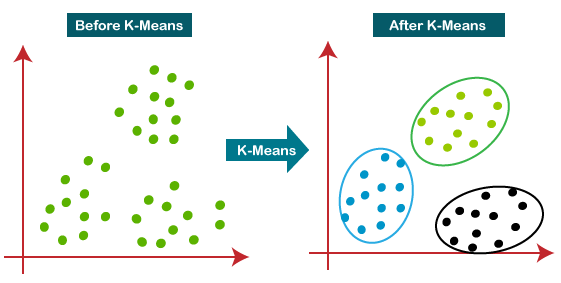


### K-Prototypes

K-Prototypes is a clustering algorithm that combines the features of both K-Means (Numerical Values) and K-Modes (Categorical Values) algorithms.

It works by assigning each data point to a cluster based on its similarity to the cluster's prototype, which is a combination of the mean of the numerical variables and the mode of the categorical variables. This allows it to identify clusters in datasets with mixed types of data, making it a powerful tool for exploratory data analysis.

For this, we will be using the kmodes library.

## Let's get started ! 

In [128]:
from kmodes.kprototypes import KPrototypes

In [129]:
df.head(2)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,1,0,22.0,0,1,1.0,1,4.0
1,0,1,38.0,1,2,1.0,2,3.0


In [130]:
categorical_features_idx=[0,1,3,4,5,6] #Categorical columns of our dataset
mark_array=df.values

In [131]:
kproto = KPrototypes(n_clusters=4, verbose=2, max_iter=20).fit(mark_array, categorical=categorical_features_idx)


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 2024, ncost: 316277.1895597016
Run: 1, iteration: 2/20, moves: 881, ncost: 298102.8559032491
Run: 1, iteration: 3/20, moves: 180, ncost: 297157.4477834406
Run: 1, iteration: 4/20, moves: 92, ncost: 296780.4127448878
Run: 1, iteration: 5/20, moves: 55, ncost: 296484.4970682157
Run: 1, iteration: 6/20, moves: 29, ncost: 296384.69077076565
Run: 1, iteration: 7/20, moves: 17, ncost: 296372.0370203669
Run: 1, iteration: 8/20, moves: 0, ncost: 296372.0370203669
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 1214, ncost: 300886.8014268621
Run: 2, iteration: 2/20, moves: 229, ncost: 296437.6798723265
Run: 2, iteration: 3/20, moves: 28, ncost: 296422.8137012518
Run: 2, iteration: 4/20, moves: 18, ncost: 296409.5277723897
Run: 2, iteration: 5/20, 

### Cluster Analysis : Let's de-code the dataset values and try to understand it ! 

In [132]:
clusters = kproto.predict(mark_array, categorical=categorical_features_idx)
df['cluster'] = list(clusters)
df['Profession']=original_df['Profession']
df['Gender']=original_df['Gender']
df['Ever_Married']=original_df['Ever_Married']
df['Graduated']=original_df['Graduated']
df['Spending_Score']=original_df['Spending_Score']
df['ID']=original_df['ID']

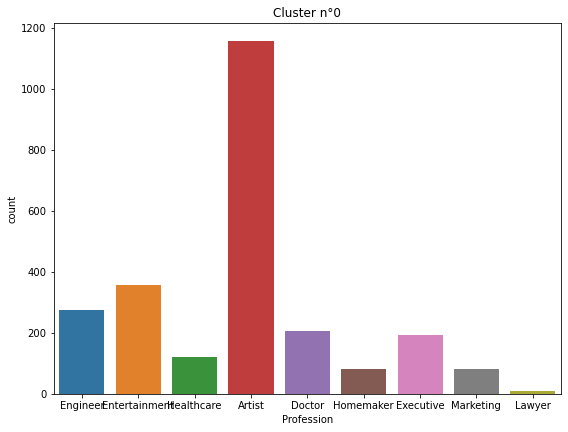

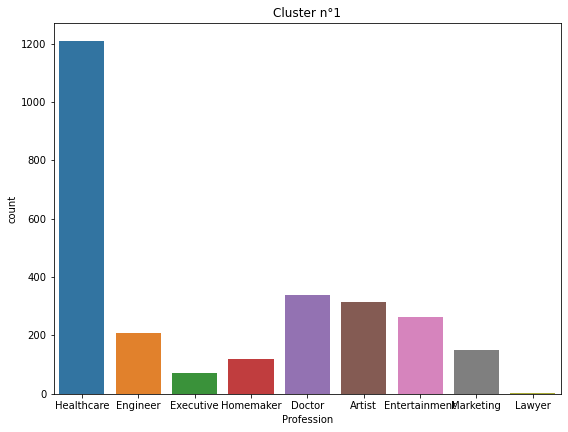

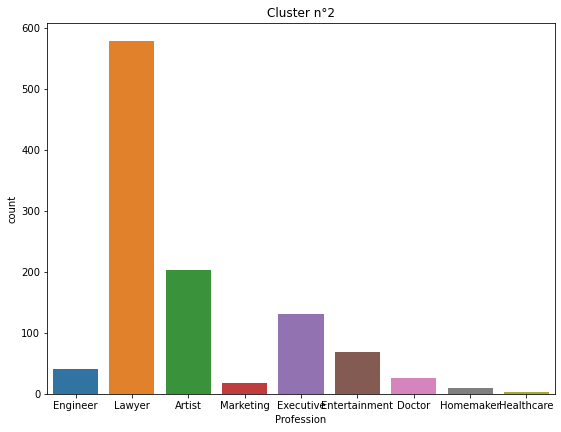

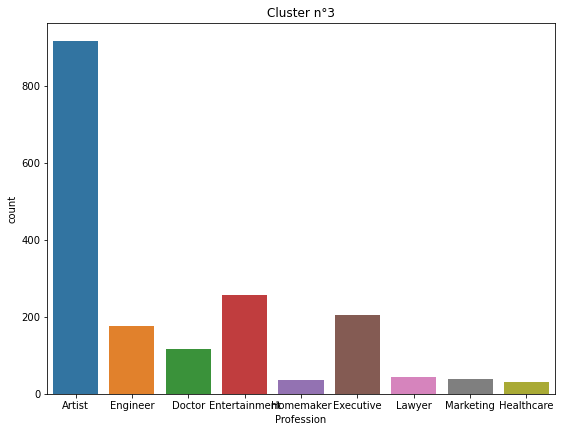

In [134]:
for i in [0,1,2,3]:
    plt.figure(figsize=(20,15))
    plt.subplot(2,2,i+1)
    plt.title("Cluster n°"+str(i))
    df.query("cluster=="+str(i))
    sns.countplot(df.query("cluster=="+str(i)),x="Profession")

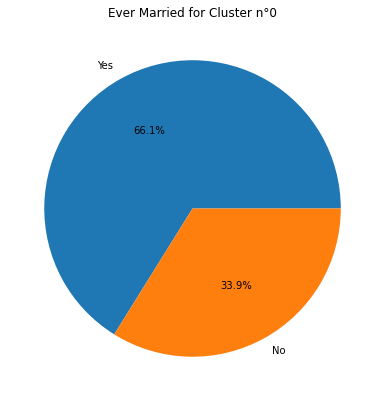

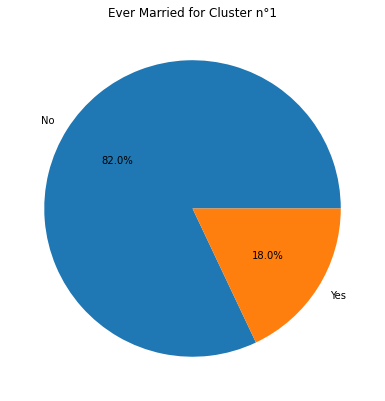

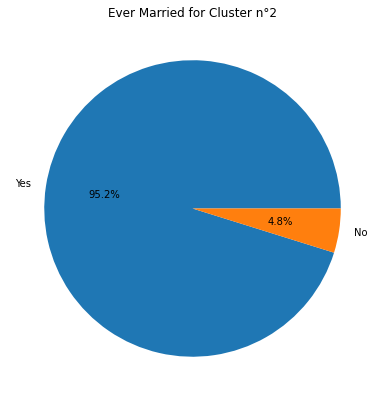

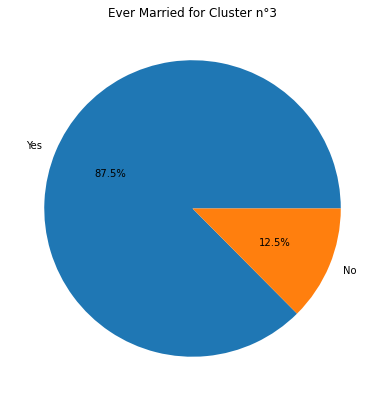

In [146]:
for i in [0,1,2,3]:
    plt.figure(figsize=(20,15))
    plt.subplot(2,2,i+1)
    data = df.query("cluster=="+str(i)).Ever_Married.value_counts()


    plt.pie(data, labels=data.index, autopct='%1.1f%%')
    plt.title('Ever Married for Cluster n°'+str(i))
    plt.show()

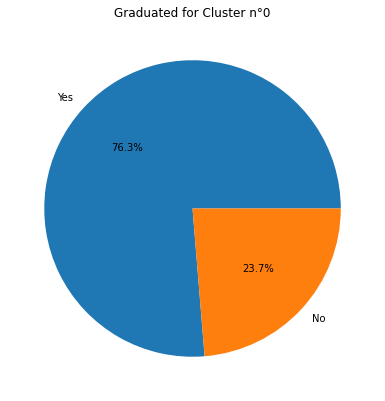

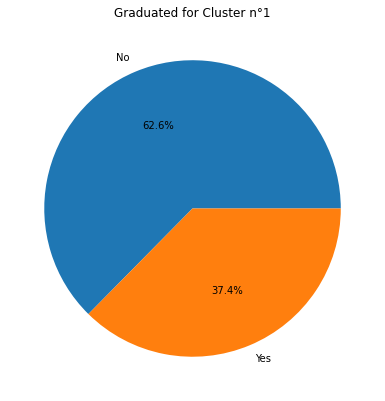

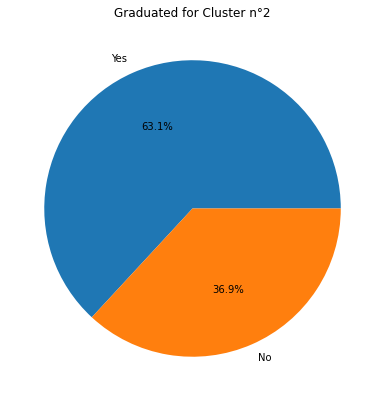

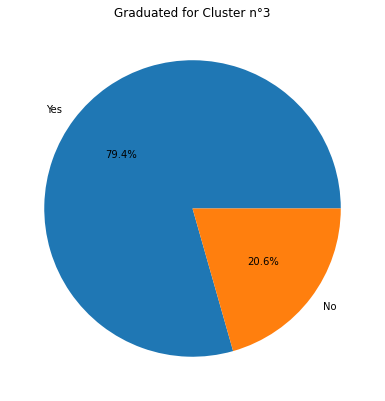

In [149]:
for i in [0,1,2,3]:
    plt.figure(figsize=(20,15))
    plt.subplot(2,2,i+1)
    data = df.query("cluster=="+str(i)).Graduated.value_counts()


    plt.pie(data, labels=data.index, autopct='%1.1f%%')
    plt.title('Graduated for Cluster n°'+str(i))
    plt.show()

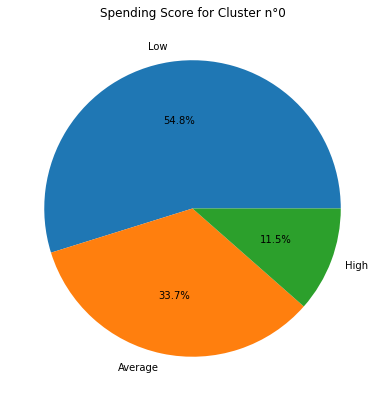

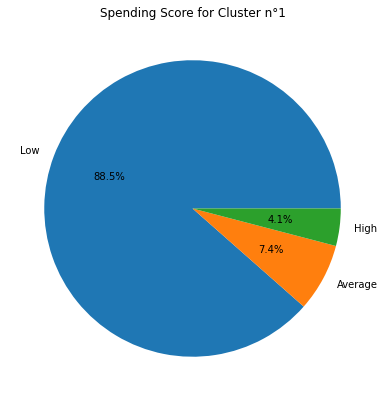

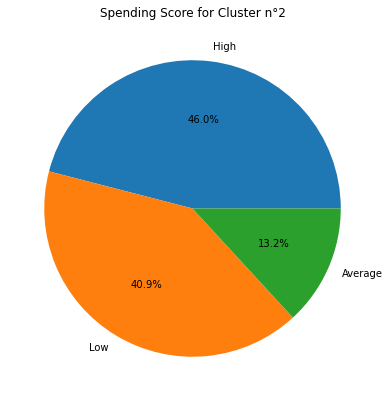

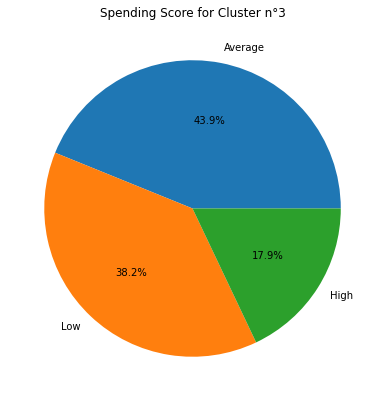

In [150]:
for i in [0,1,2,3]:
    plt.figure(figsize=(20,15))
    plt.subplot(2,2,i+1)
    data = df.query("cluster=="+str(i)).Spending_Score.value_counts()


    plt.pie(data, labels=data.index, autopct='%1.1f%%')
    plt.title('Spending Score for Cluster n°'+str(i))
    plt.show()

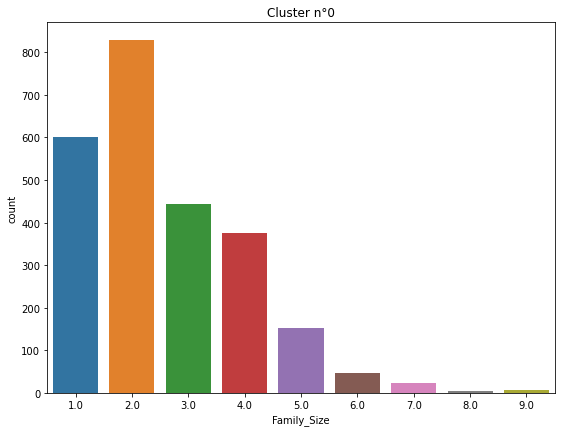

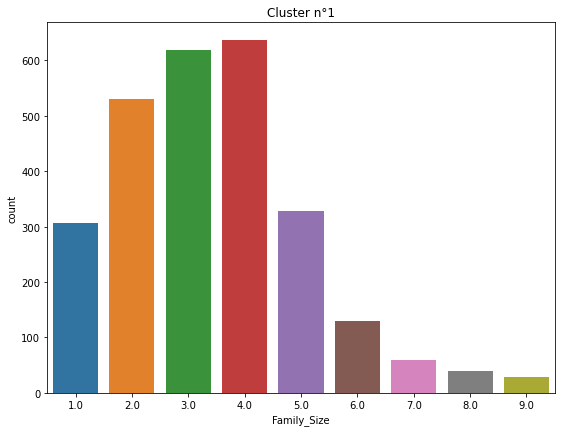

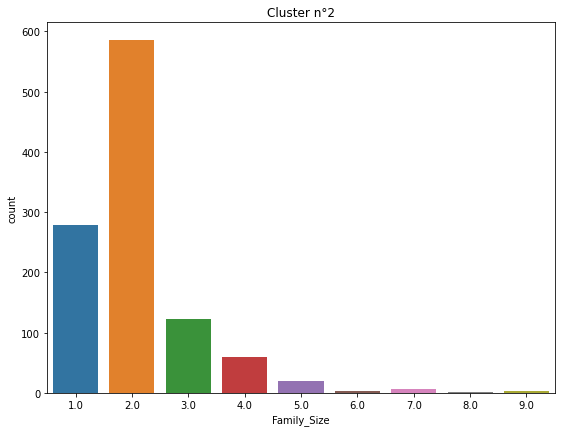

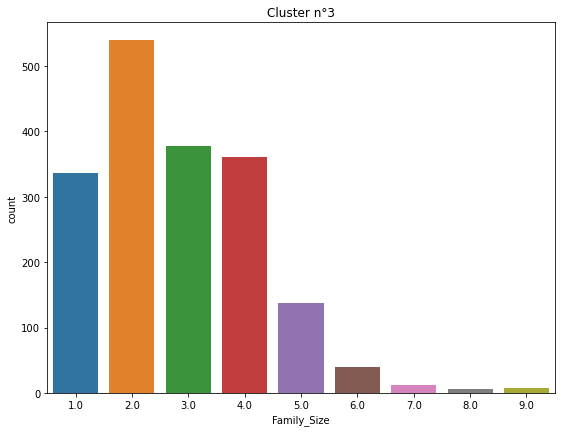

In [151]:
for i in [0,1,2,3]:
    plt.figure(figsize=(20,15))
    plt.subplot(2,2,i+1)
    plt.title("Cluster n°"+str(i))
    df.query("cluster=="+str(i))
    sns.countplot(df.query("cluster=="+str(i)),x="Family_Size")

In [154]:
print(df[['cluster','Age']].groupby(by=['cluster']).mean())

               Age
cluster           
0        40.252721
1        26.537916
2        74.789620
3        54.276280


### Summary of Clusters' features

#### Cluster 0
<u>Jobs :</u> Mostly Artist - Entertainment - Engineer

<u>Married ? :</u> Yes 66 % / No 34 % 

<u>Graduated ? :</u> Yes 76 % / No 24 % 

<u>Spending Score :</u>  Low 55% / Average 34 % / High 11 % 

<u>Family Size :</u> Mostly 2 / Sometimes 1 / Sometimes 3  

<u>Average Age :</u> 40

<u>Description :</u>

Cluster 0 is characterized by customers who are mostly in the artistic, entertainment and engineering fields, have a low and average spending score, and are mostly married and graduated, with an average age of 40. 

They are likely to be budget-conscious shoppers but also willing to spend on average priced items. They are likely to have a family and are in the prime of their career, likely to have a balance between work and personal life.


#### Cluster 1
<u>Jobs :</u> Mostly Healthcare - Doctor - Artist

<u>Married ? :</u> Yes 18 % / No 82 % 

<u>Graduated ? :</u> Yes 37 % / No 63 % 

<u>Spending Score :</u>  Low 88% / Average 8 % / High 4 % 

<u>Family Size :</u> Mostly 4 or 3 or 2   

<u>Average Age :</u> 26

<u>Description :</u>

Cluster 1 is characterized by customers who are mostly in the healthcare and artistic fields, have a low spending score, and are mostly not married and not graduated, with a young average age.

They are mostly budget-conscious shoppers and have a higher chance to be family-oriented.


#### Cluster 2
<u>Jobs :</u> Mostly Lawyer - Artist - Execution

<u>Married ? :</u> Yes 95 % / No 5 % 

<u>Graduated ? :</u> Yes 63 % / No 37 % 

<u>Spending Score :</u>  Low 41% / Average 13 % / High 46 % 

<u>Family Size :</u> Mostly 2 / Sometimes 1 / Sometimes 3  

<u>Average Age :</u> 74

<u>Description :</u>

Cluster 2 is characterized by customers who are mostly in the legal and artistic fields, have a low spending score, and are mostly married and graduated, with an older average age (74).

They are mostly budget-conscious shoppers but are more likely to be single. But it also includes a high number of customers with High Spending score.


#### Cluster 3
<u>Jobs :</u> Mostly Artist - Entertainment - Execution

<u>Married ? :</u> Yes 88 % / No 12 % 

<u>Graduated ? :</u> Yes 80 % / No 20 % 

<u>Spending Score :</u>  Low 38% / Average 44 % / High 18 % 

<u>Family Size :</u> Mostly 2 / Sometimes 3 / Sometimes 4  

<u>Average Age :</u> 54

<u>Description :</u>

Cluster 3 is characterized by customers who are mostly in the artistic and executive fields, have a low spending score, and are mostly married and graduated, with an average age of 54.

Cluster 3 has a higher number of customers with average spending score.

## Conclusion

#### I hope you liked this analysis, of course, I surely missed several things and I would be delighted to have your opinions and suggestions on my work! A like would be nice too <3